# Network Analysis

## 1.1 Centrality Measures
Select 3 centrality measures to characterise nodes, aiming at identifying the most important nodes in 
the underground network. Give the definition of each of the measures (including their equation), put 
the measures into the context of the underground, and why they will allow you to find the stations that 
are most crucial for the functioning of the underground. Compute the measures for your nodes in the 
network, and give the results in a table for the first 10 ranked nodes for each of the 3 measures.  

In [65]:
import pandas as pd
import numpy as np
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import json
import re
from shapely.geometry import Point, LineString
from scipy.spatial import distance
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from operator import itemgetter
import copy
import warnings
warnings.filterwarnings('ignore')

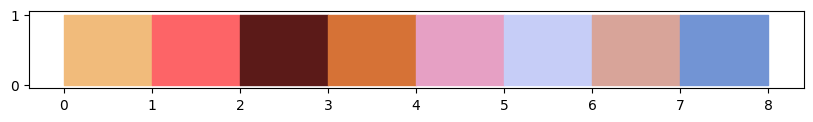

In [2]:
# Now import my favourite colour palette:
grandBudapest_colors = ["#F1BB7B", "#FD6467", "#5B1A18", "#D67236", "#E6A0C4", "#C6CDF7", "#D8A499", "#7294D4"]

# Now let's plot color pallette
plt.figure(figsize=(10, 1))
for i, color in enumerate(grandBudapest_colors):
    plt.fill_between([i, i + 1], 0, 1, color=color)


### 1.1.0 Read the data, and explore the network:

In [80]:
# make multiple copies of the graph
london_graph = nx.read_graphml('london.graph')
london_graph3a = nx.read_graphml('london.graph')
london_graph3b = nx.read_graphml('london.graph')

In [81]:
# convert str into tuple:
for node in london_graph.nodes():
    london_graph.nodes[node]['coords'] = eval(london_graph.nodes[node]['coords'])

In [82]:
# convert str into tuple:
for node in london_graph3a.nodes():
    london_graph3a.nodes[node]['coords'] = eval(london_graph3a.nodes[node]['coords'])

In [83]:
# convert Str into tuple:
for node in london_graph3b.nodes():
    london_graph3b.nodes[node]['coords'] = eval(london_graph3b.nodes[node]['coords'])

In [84]:
# Take a look at our data
print("number of nodes: ",london_graph.number_of_nodes())
print("number of edges: ",london_graph.number_of_edges())

number of nodes:  401
number of edges:  467


In [85]:
list(london_graph.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [86]:
# To check edges attributes:
list(london_graph.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

In [87]:
counter = 0
# Iterate through each node and print its attributes
for node, attrs in london_graph.nodes(data=True):
    print(f"Node: {node}, Attributes: {attrs}")
   
    # check first 10
    counter += 1
    if counter == 10:
        break  # Exit the loop

Node: Wembley Park, Attributes: {'coords': (519316.5590174915, 186389.32981656672)}
Node: Kingsbury, Attributes: {'coords': (519359.9688603217, 188721.22027255083)}
Node: Queensbury, Attributes: {'coords': (518811.3613368616, 189760.50737704366)}
Node: Canons Park, Attributes: {'coords': (518183.29968291725, 191257.26260848)}
Node: Stanmore, Attributes: {'coords': (517580.4596464033, 192537.99948098673)}
Node: Stratford, Attributes: {'coords': (538524.7855297636, 184373.34100822973)}
Node: West Ham, Attributes: {'coords': (539160.2577659411, 182933.290067989)}
Node: Canning Town, Attributes: {'coords': (539439.020753582, 181338.40907066417)}
Node: North Greenwich, Attributes: {'coords': (539189.2108512281, 179809.60035511653)}
Node: Canary Wharf, Attributes: {'coords': (537586.6947649193, 180311.85419390627)}


Plot the entire network:

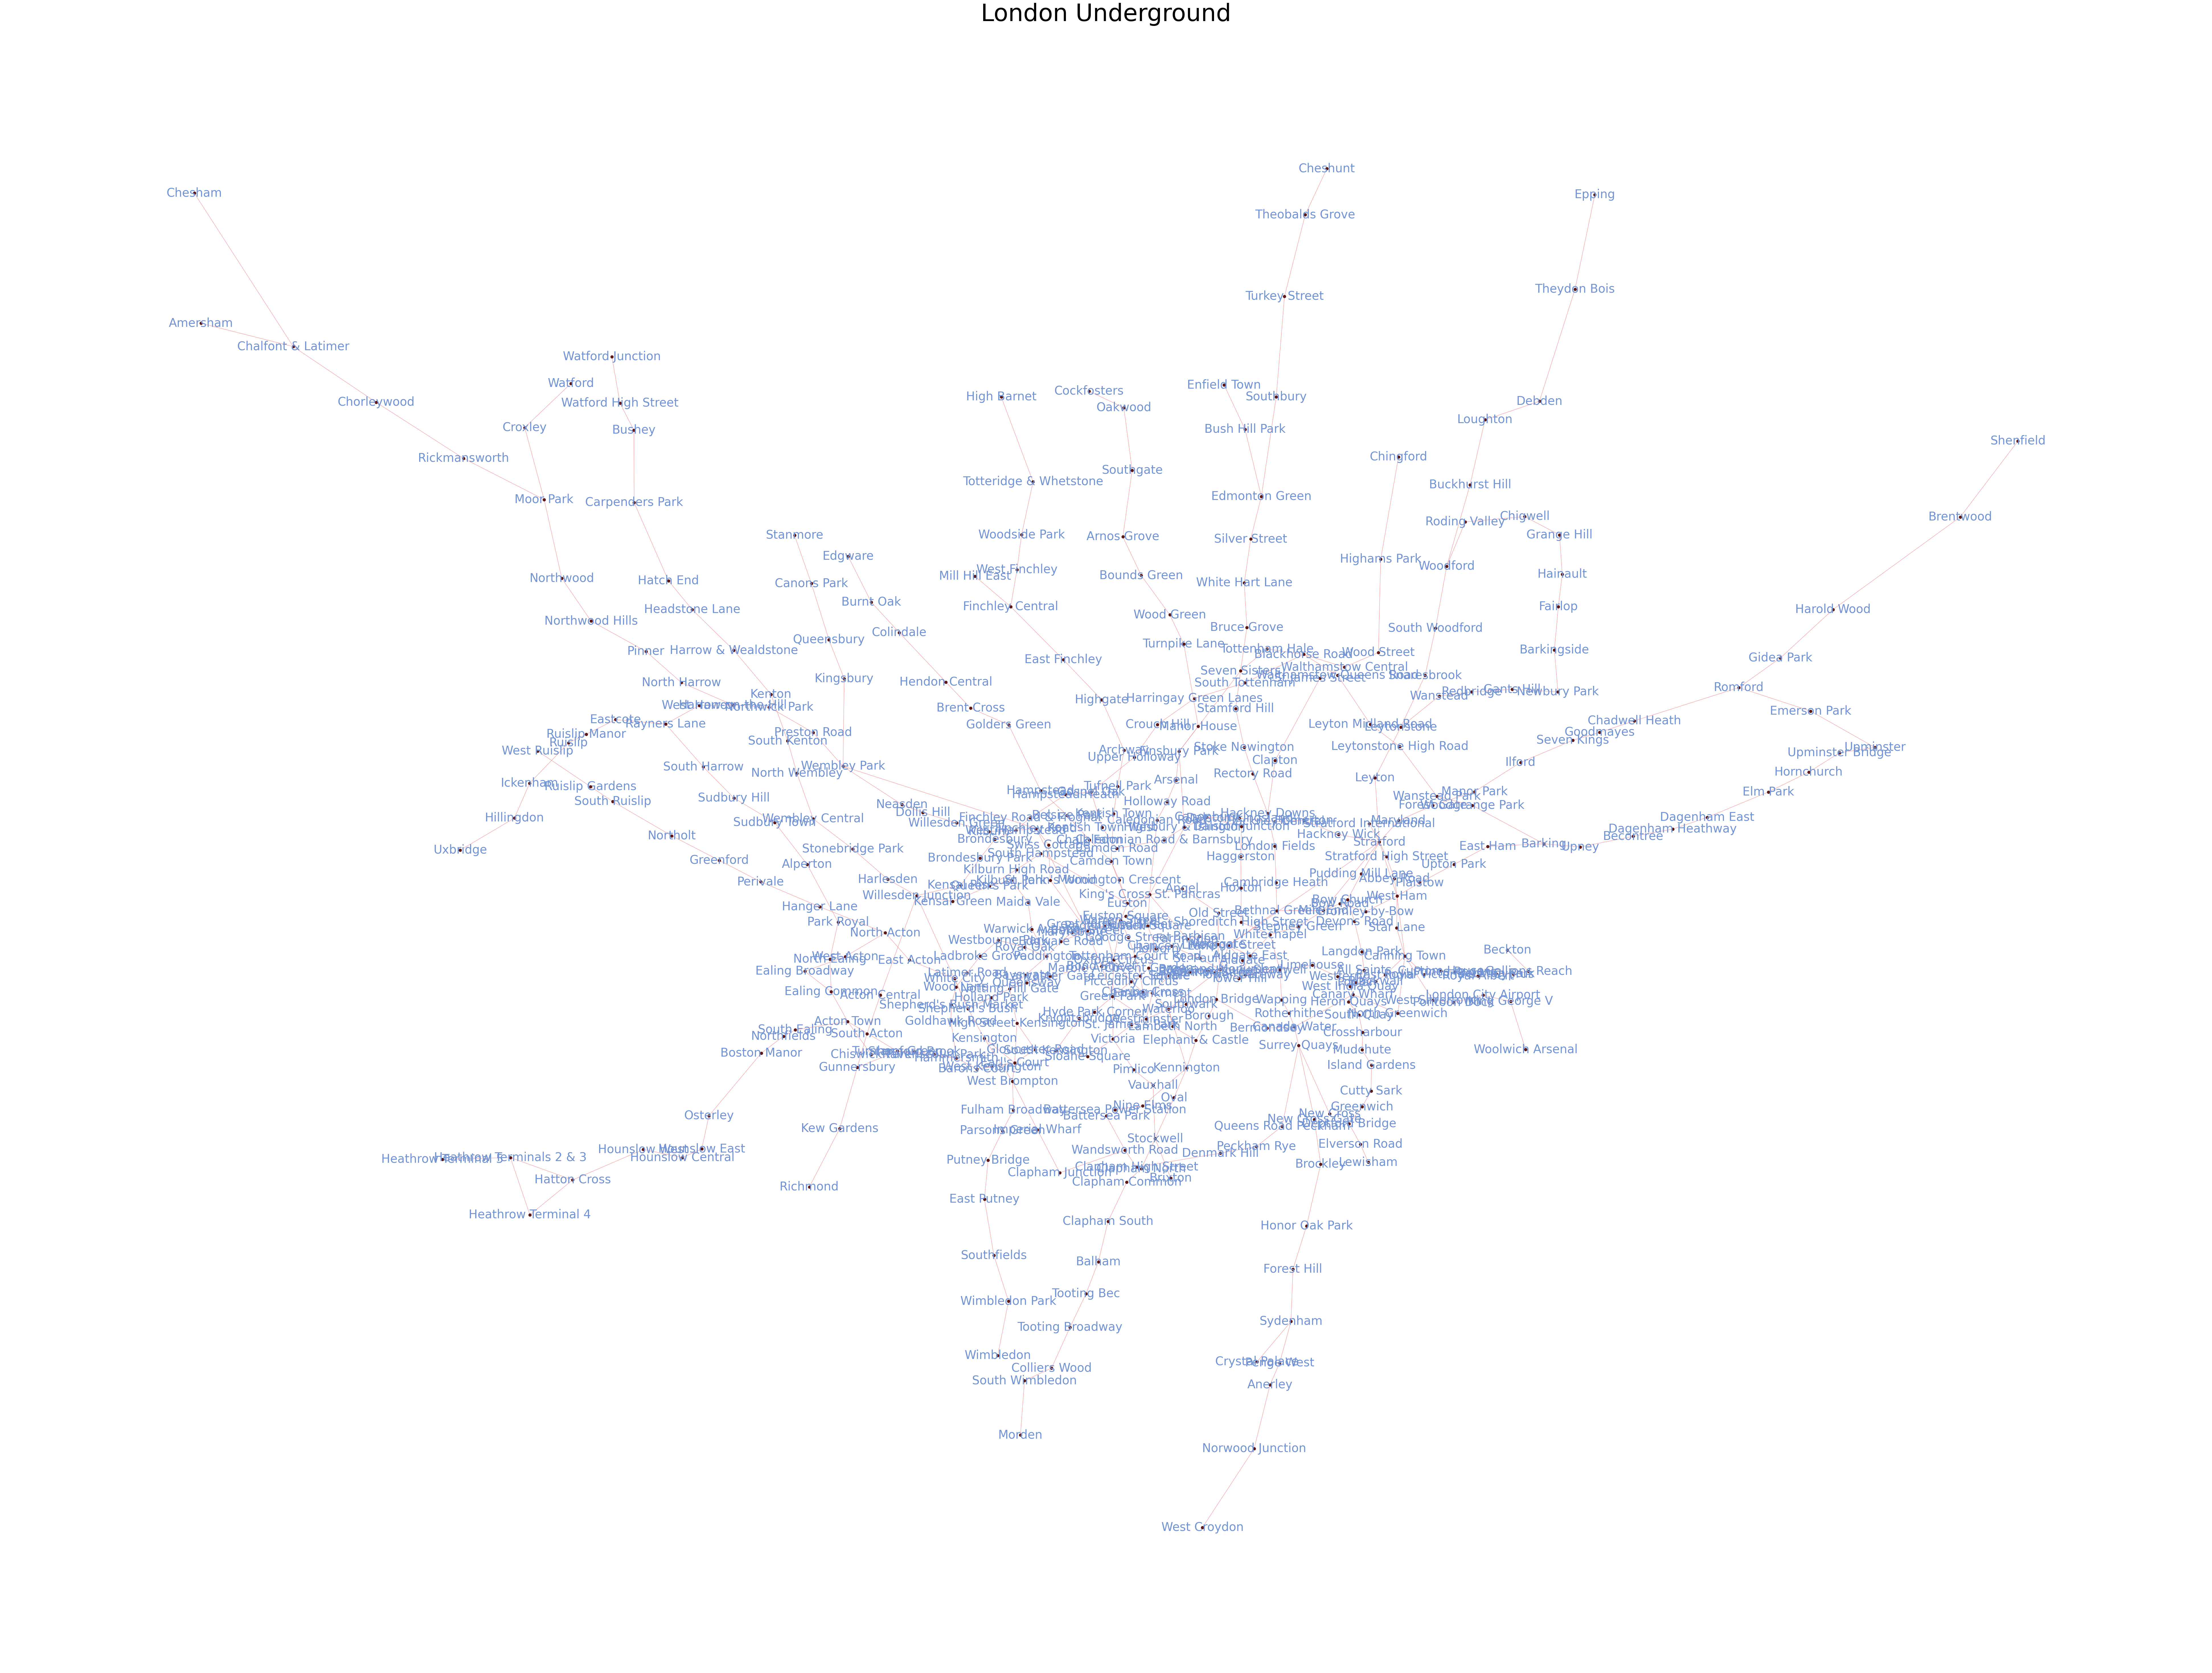

In [88]:
fig, ax = plt.subplots(figsize=(100,75))

node_labels = {node: node for node in london_graph.nodes()}
pos = nx.get_node_attributes(london_graph, 'coords')

nx.draw_networkx_nodes(london_graph, pos, node_size=50, node_color=grandBudapest_colors[2])
nx.draw_networkx_edges(london_graph, pos, arrows=False, width=0.6, edge_color=grandBudapest_colors[1])
nx.draw_networkx_labels(london_graph, pos, node_labels, font_size=30, font_color=grandBudapest_colors[7])

plt.title("London Underground",fontsize=60)
plt.axis("off")
plt.show()

In [89]:
network_df = nx.to_pandas_edgelist(london_graph)

In [54]:
network_df.head()

,source,target,length,flows,line_name
0,Wembley Park,Kingsbury,2916.771558,12356,Jubilee
1,Wembley Park,Neasden,2353.165938,6744,Jubilee
2,Wembley Park,Preston Road,1419.735166,36601,Metropolitan
3,Wembley Park,Finchley Road,7266.373927,55216,Metropolitan
4,Kingsbury,Queensbury,1245.995234,9419,Jubilee


### 1.1.1 Calculate Three Centrality Measures
degree, betweenness, delta

In [59]:
degree_centrality = nx.degree_centrality(london_graph)
nx.set_node_attributes(london_graph,dict(degree_centrality),'degree_centrality')
# To dataframe using the nodes as the index
df_deg = pd.DataFrame(index=london_graph.nodes())
df_deg['degree_centrality'] = pd.Series(nx.get_node_attributes(london_graph, 'degree_centrality'))
df_deg_sorted = df_deg.sort_values(["degree_centrality"], ascending=False)
df_deg_sorted[0:10]

,degree_centrality
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


In [61]:
betweenness_centrality = nx.betweenness_centrality(london_graph)
nx.set_node_attributes(london_graph,dict(betweenness_centrality),'betweenness_centrality')
# To dataframe using the nodes as the index
df_bet = pd.DataFrame(index=london_graph.nodes())
df_bet ['betweenness_centrality'] = pd.Series(nx.get_node_attributes(london_graph, 'betweenness_centrality'))
df_bet_sorted = df_bet.sort_values(["betweenness_centrality"], ascending=False)
df_bet_sorted[0:10]

,betweenness_centrality
Stratford,0.297846
Bank and Monument,0.290489
Liverpool Street,0.270807
King's Cross St. Pancras,0.255307
Waterloo,0.243921
Green Park,0.215835
Euston,0.208324
Westminster,0.203335
Baker Street,0.191568
Finchley Road,0.165085


In [66]:
# Compute initial betweenness centrality
initial_betweenness = nx.betweenness_centrality(london_graph)

# Initialize a dictionary to store delta centrality
delta_centrality = {}

# Iterate over all nodes to compute delta centrality
for node in london_graph.nodes():
    # Create a copy of the graph without the current node
    london_graph_copy = copy.deepcopy(london_graph)
    london_graph_copy.remove_node(node)
    
    # Recompute betweenness centrality without the node
    new_betweenness = nx.betweenness_centrality(london_graph_copy)
    
    # Calculate the difference and store it
    delta_centrality[node] = sum(abs(initial_betweenness[n] - new_betweenness.get(n, 0)) for n in initial_betweenness)

# Sort nodes by their delta centrality
sorted_delta_centrality = sorted(delta_centrality.items(), key=lambda x: x[1], reverse=True)

In [77]:
df_delta = pd.DataFrame(sorted_delta_centrality)

In [79]:
df_delta.head(11)

,0,1
0,Stratford,4.135097
1,King's Cross St. Pancras,3.258029
2,Bank and Monument,2.959924
3,Finchley Road,2.926546
4,Euston,2.844532
5,Baker Street,2.796143
6,Waterloo,2.787017
7,Wembley Park,2.769113
8,Liverpool Street,2.566975
9,Preston Road,2.503106


## 1.2 Impact Measures
Find 2 different measures to evaluate the impact of the node removal on the network. These need to 
be global measures referring to the whole network and not to specific nodes or links. Explain whether 
these two measures are specific to the London underground, or whether they could also be used to 
evaluate the resilience of any other network.  

### 1.2.0 Selecting Impact Measures


In [90]:
 #We can print the dataframe from the shapefile to check the data
df_edge = nx.to_pandas_edgelist(london_graph)
df_edge[0:20]

,source,target,length,flows,line_name
0,Wembley Park,Kingsbury,2916.771558,12356,Jubilee
1,Wembley Park,Neasden,2353.165938,6744,Jubilee
2,Wembley Park,Preston Road,1419.735166,36601,Metropolitan
3,Wembley Park,Finchley Road,7266.373927,55216,Metropolitan
4,Kingsbury,Queensbury,1245.995234,9419,Jubilee
5,Queensbury,Canons Park,1693.307343,6385,Jubilee
6,Canons Park,Stanmore,1419.669476,3624,Jubilee
7,Stratford,West Ham,1673.509515,91801,Jubilee
8,Stratford,Mile End,2805.001392,12010,Central
9,Stratford,Leyton,2131.342926,56082,Central


In [52]:
#if want to know what is the maximum distance between stations
max_dist=max({weight for e1, e2, weight in london_graph.edges(data='length')})

#This distance in given in meters
#if want to know the name of stations which are further away from each other
furthest_stat = [(d['station_1_'],d['station_2_']) for  u,v,d in london_graph.edges(data=True) if d['length'] == max_dist]

#if want to know to which stations Baker Street is directly connected to
Baker_Street = [(d['station_1_'],d['station_2_']) for  u,v,d in london_graph.edges(data=True) if d['station_1_'] == 'Baker Street'or d['station_2_'] == 'Baker Street']
(max_dist,furthest_stat,Baker_Street)

(7113.318903338077,
 [('Wembley Park', 'Finchley Road')],
 [('Edgware Road', 'Baker Street'),
  ('Baker Street', 'Great Portland Street'),
  ('Baker Street', 'Bond Street'),
  ('Baker Street', "St. John's Wood"),
  ('Baker Street', 'Finchley Road'),
  ('Baker Street', 'Marylebone'),
  ('Baker Street', "Regent's Park")])

## 1.3 Node Removal
For each of the centrality measures selected in I.1. remove at least 10 nodes following two different 
strategies. A) Non-sequential removal: using the table created in I.1. remove 1 node at a time 
following the rank in the table, i.e. from the most important one to the 10

th most important one. After 
each removal, evaluate the impact of the removal using your two measures in I.2. and proceed until 
you have removed at least 10 nodes. B) Sequential: remove the highest ranked node and evaluate the 
impact using the 2 measures. After removal, re-compute the centrality measure. Remove the highest 
ranked node in the new network and evaluate the impact. Continue until removing at least 10 nodes. 

Report the results of the 2 strategies in one plot, and critically discuss the following: which centrality 
measure reflects better the importance of a station for the functioning of the underground, which 
strategy is more effective at studying resilience, and which impact measure is better at assessing the 
damage after node removal.  